In [1]:
import final as fin
import numpy as np
import matplotlib.pyplot as plt
from distance import gps_wgs84

In [2]:
fin.list_files_with_string('/workspaces/CP1-24-final/iglesias-cardinale/data/Final', 'ic0', '.md')

AttributeError: module 'final' has no attribute 'list_files_with_string'

In [ ]:
def fit(x,a,b,c):
    return a*x**b + c

fin.curvefit(fit, [1,1.001,0], [0,1,2,3,4], [0,1,2,3,4], np.array([0.1, 1, 20, 200, 0.4]))

ValueError: Error: Maximum iterations reached without convergence.

The peak spatial frequency is 0.000 1/m


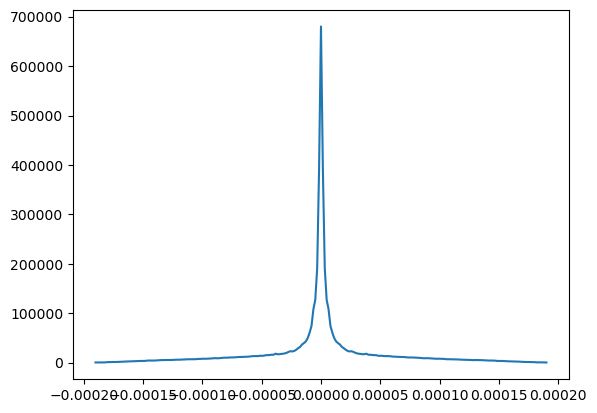

In [ ]:
(t, lat, lon, alt, alt84, speed, 
 direction, distance, sigma_horz_meters, sigma_alt_meters, satellites) = np.loadtxt(
    fin.list_files_with_string('/workspaces/CP1-24-final/iglesias-cardinale/data/Final', 'ic0', '.csv')[0],
    skiprows=1,
    delimiter = ',',
    unpack=True)

x, y, z = gps_wgs84(lat, lon, alt84)

lat = lat - lat[0]
lon = lon - lon[0]

fft_spectrum = np.fft.fft(lon*6378137)

dx = lat[1]*6378137 - lat[0]*6378137  # Sampling interval (check uniformity!)
frequencies = np.fft.fftfreq(len(lat), d=dx)

shifted_spectrum = np.fft.fftshift(fft_spectrum)
shifted_frequencies = np.fft.fftshift(frequencies)

plt.plot(shifted_frequencies, np.abs(shifted_spectrum))

peak_index = np.argmax(np.abs(shifted_spectrum))  # Index of maximum amplitude
peak_frequency = shifted_frequencies[peak_index]  # Spatial frequency at the peak

# Output result
print(f"The peak spatial frequency is {peak_frequency:.3f} 1/m")

#plt.plot(lon[1:len(lon)]*6378137, np.fft.fftshift(fin.forward_fft(lat[1:len(lon)]*6378137)), '.', linestyle = 'none')
